# Histogramas:

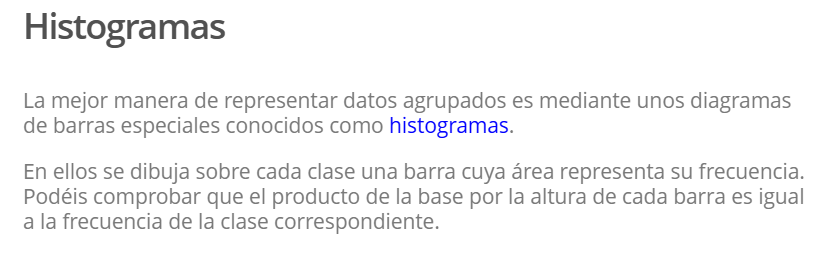

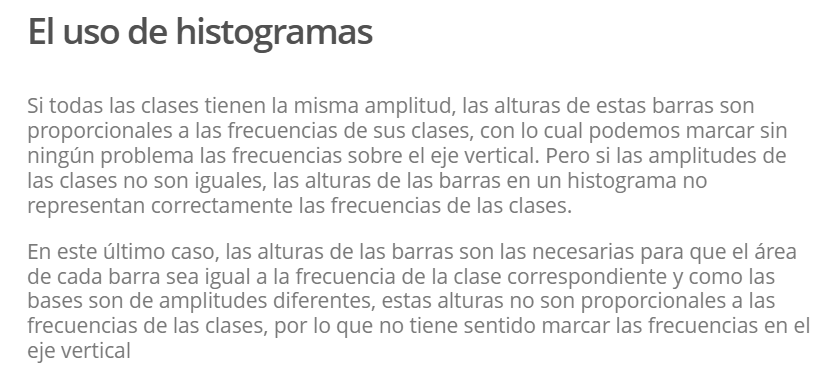

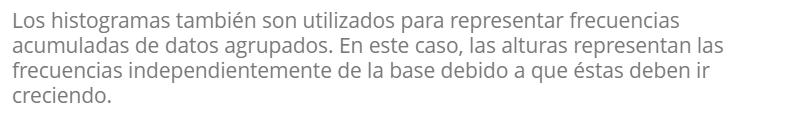

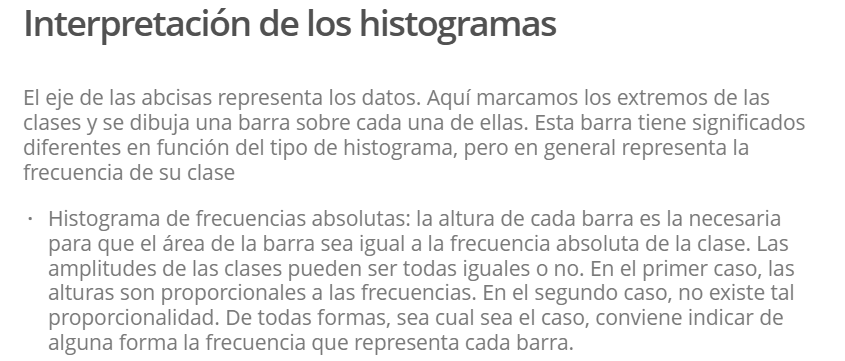

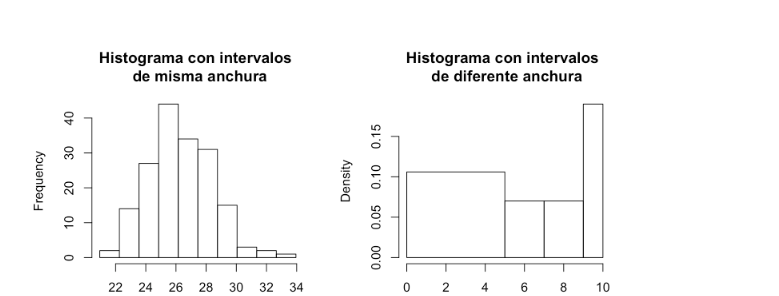

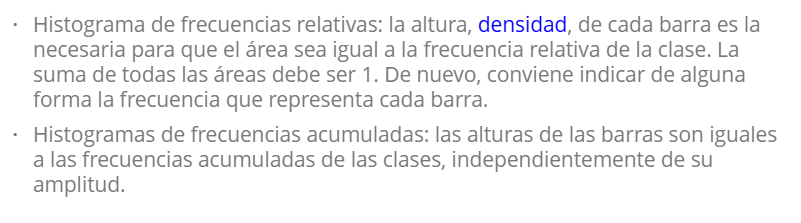

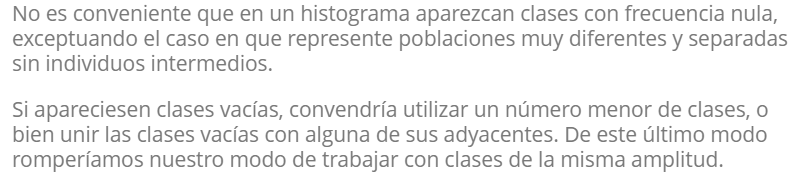

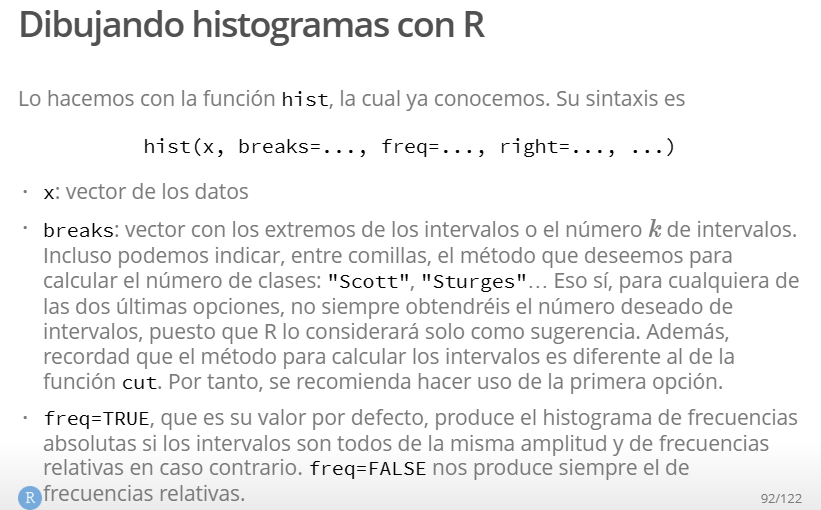

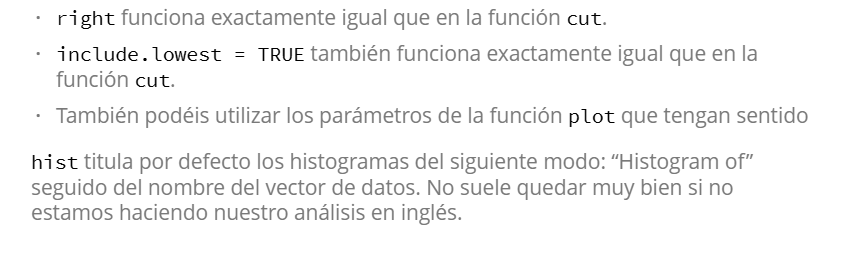

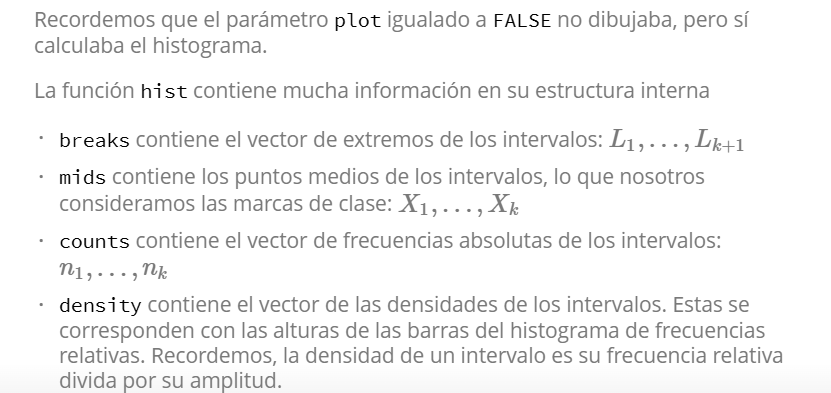

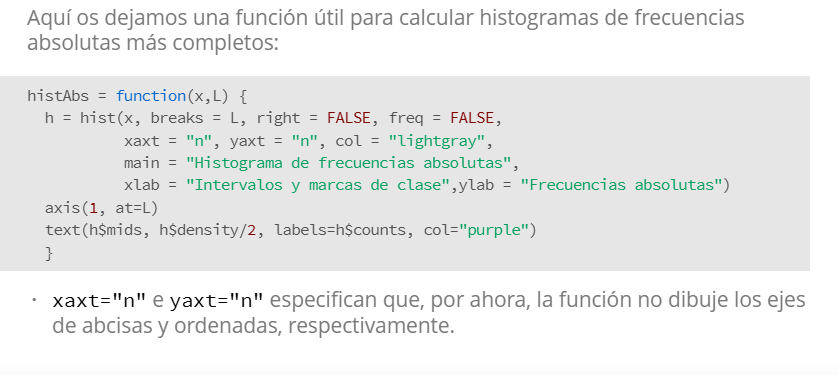

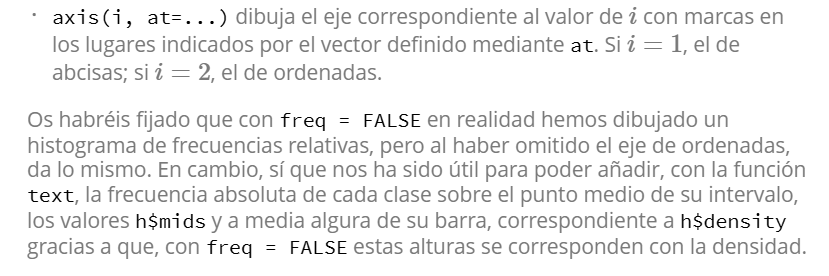

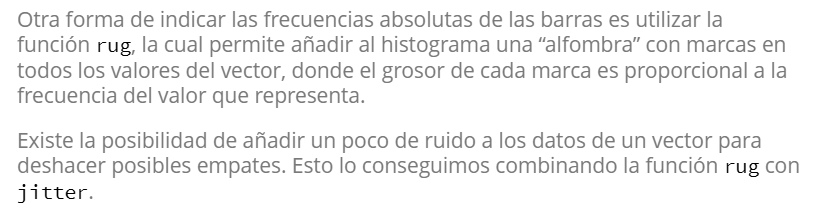

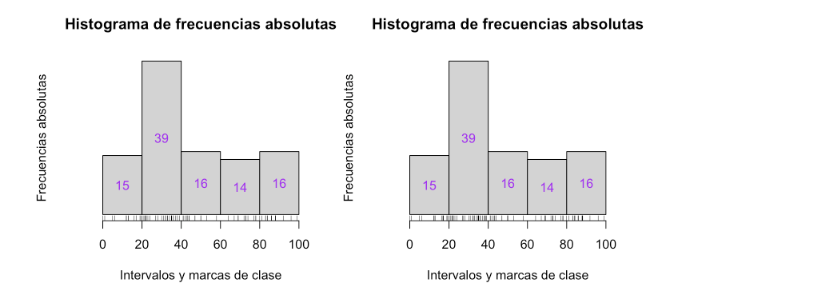

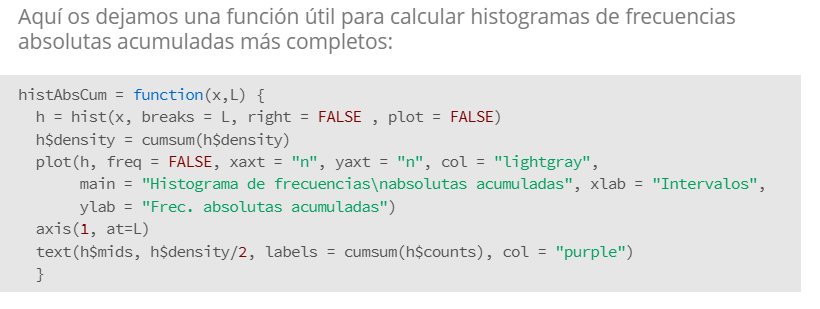

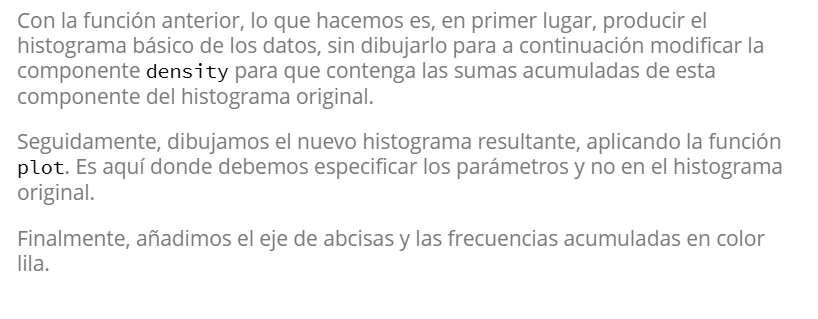

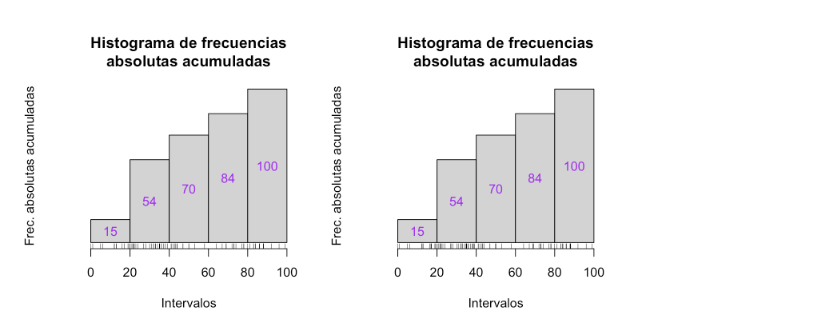

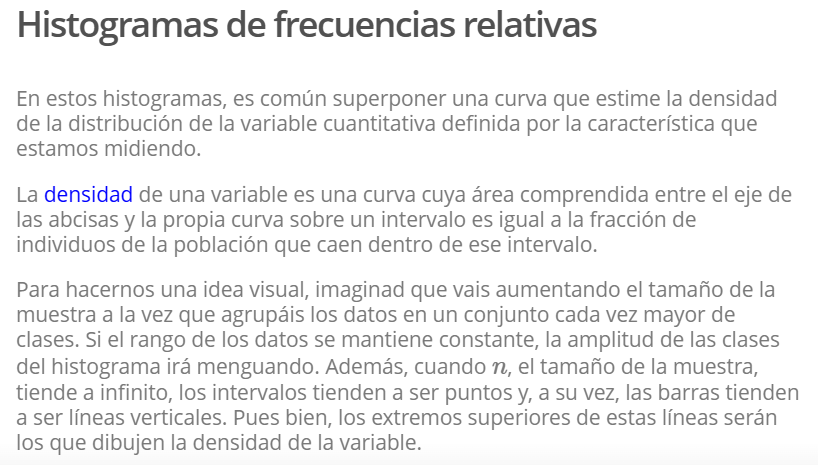

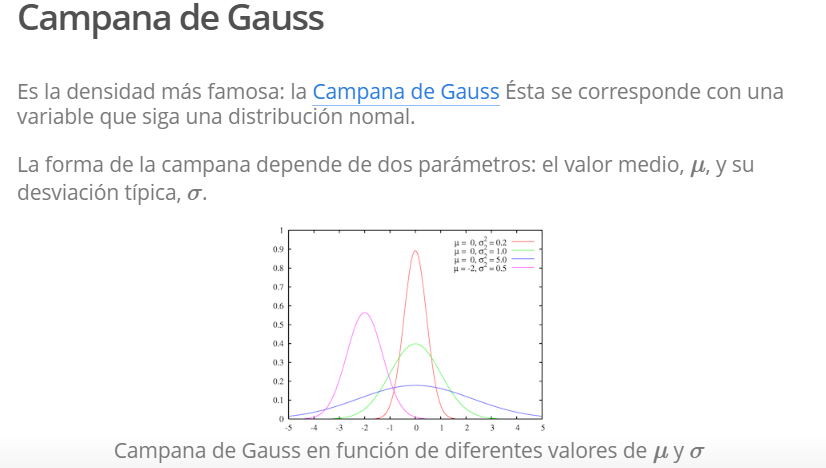

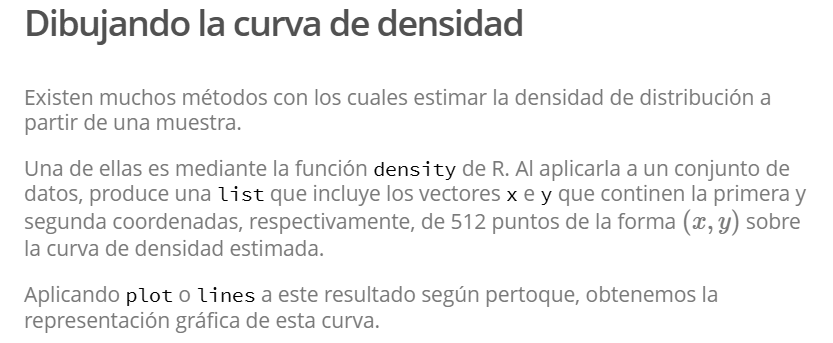

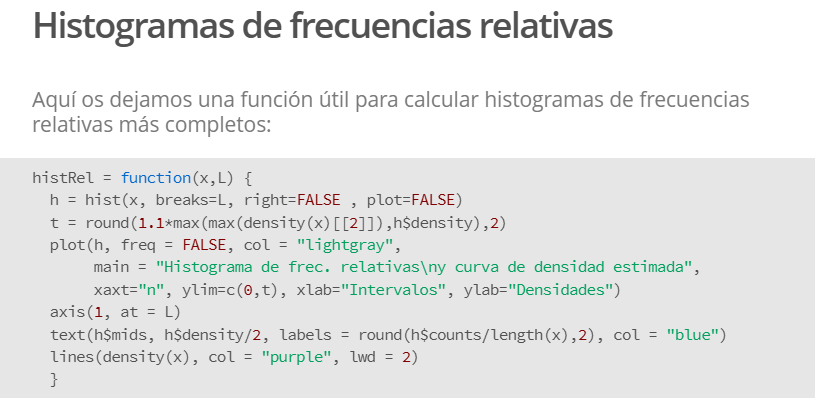

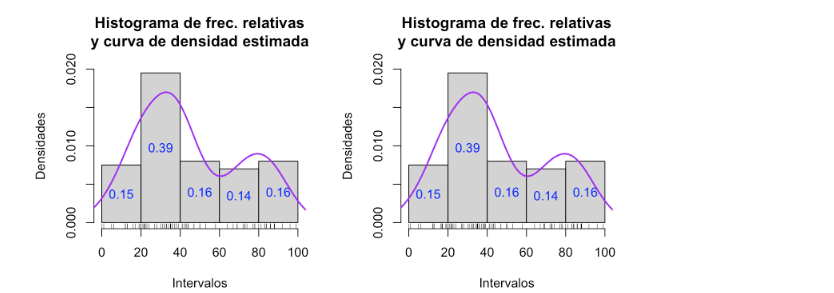

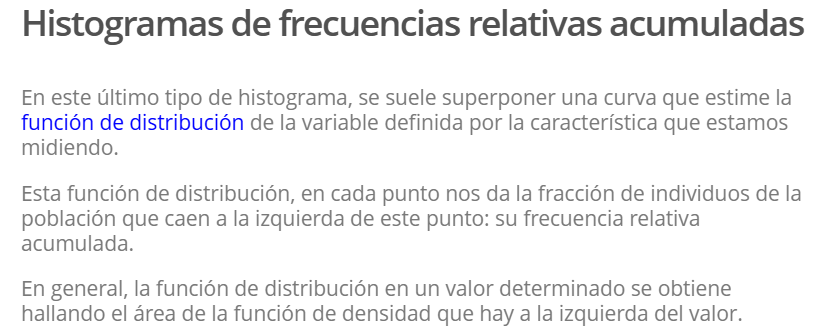

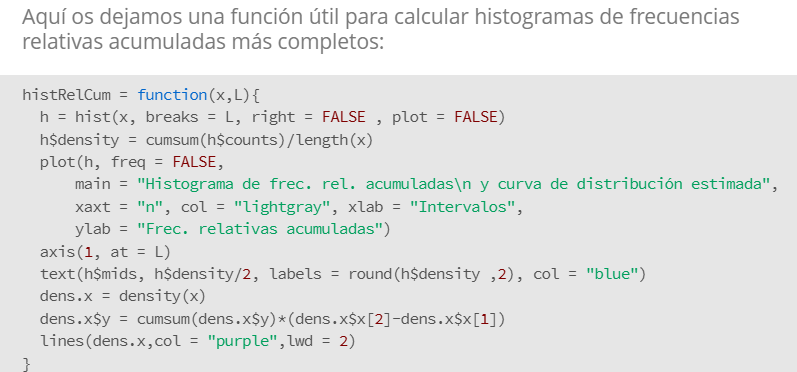

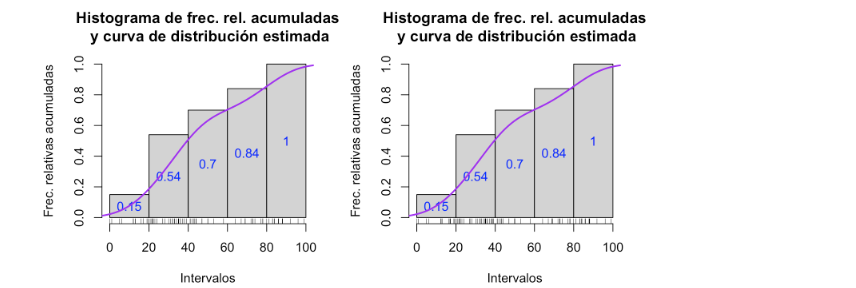

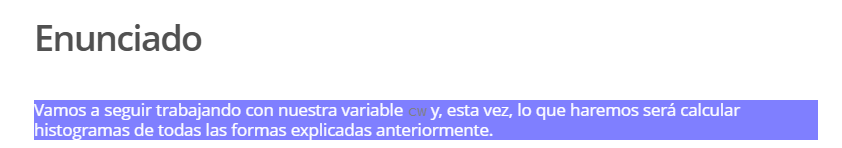

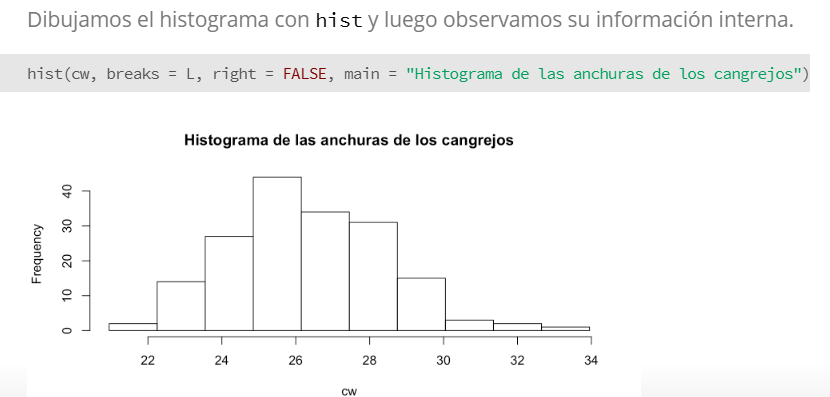

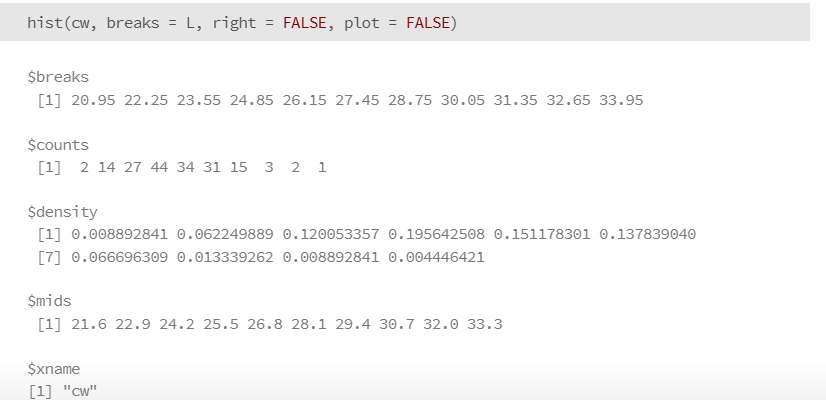

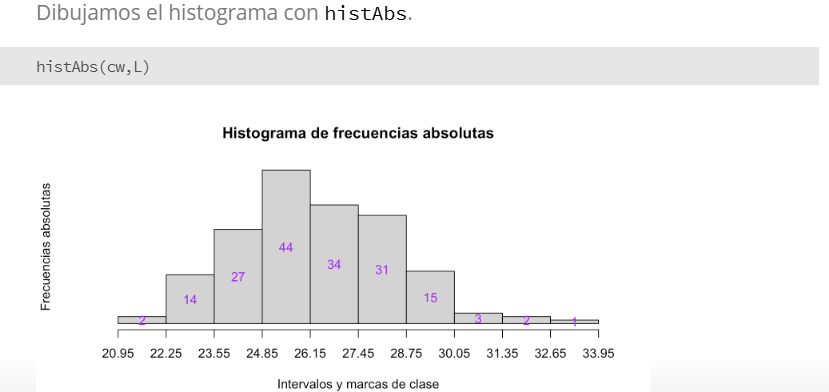

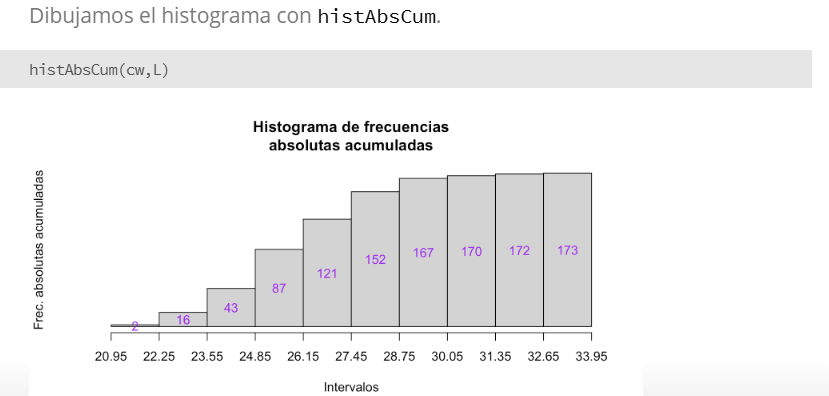

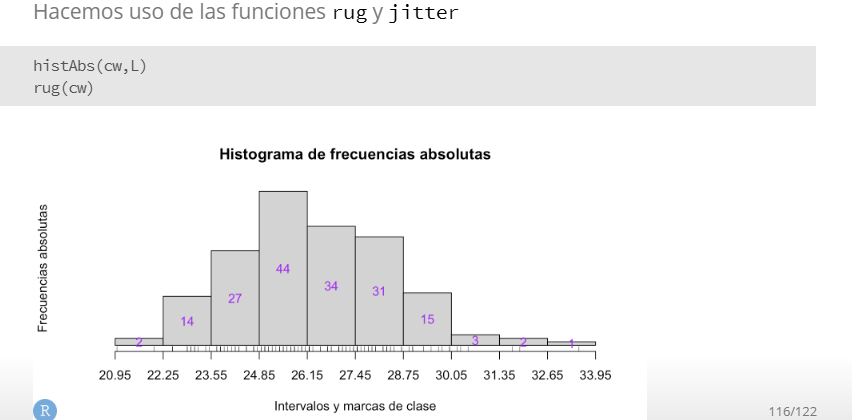

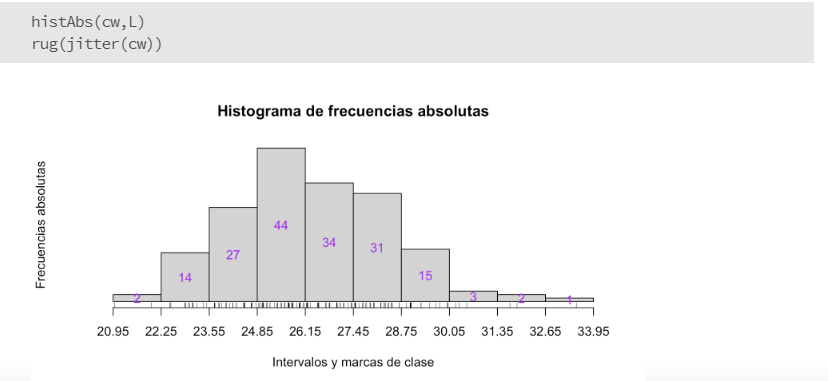

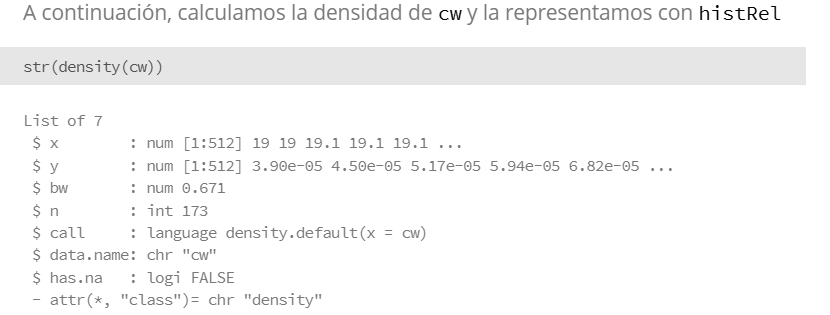

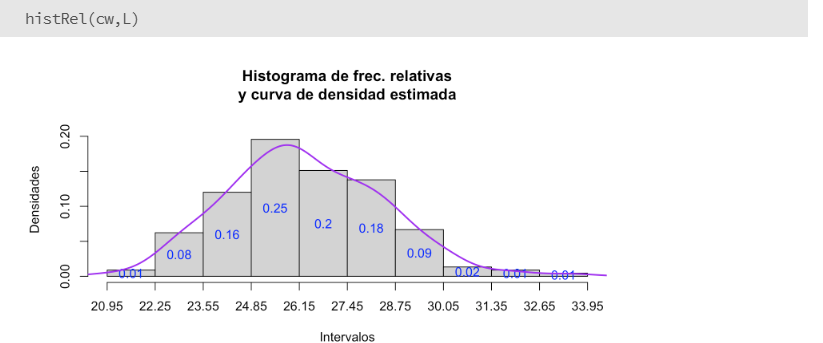

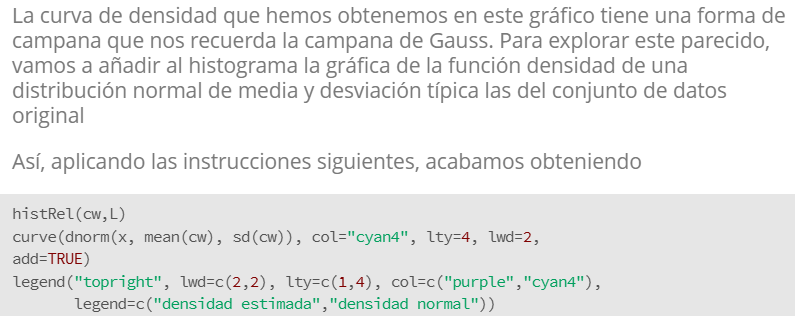

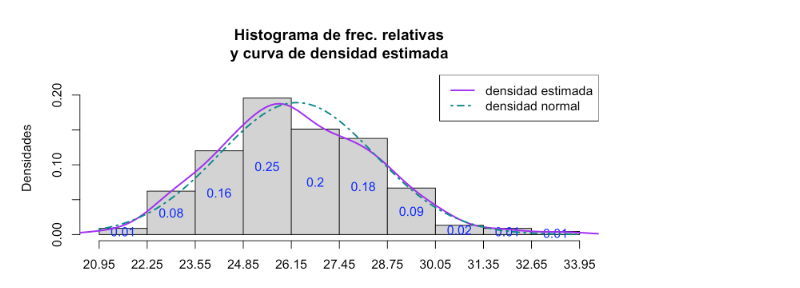

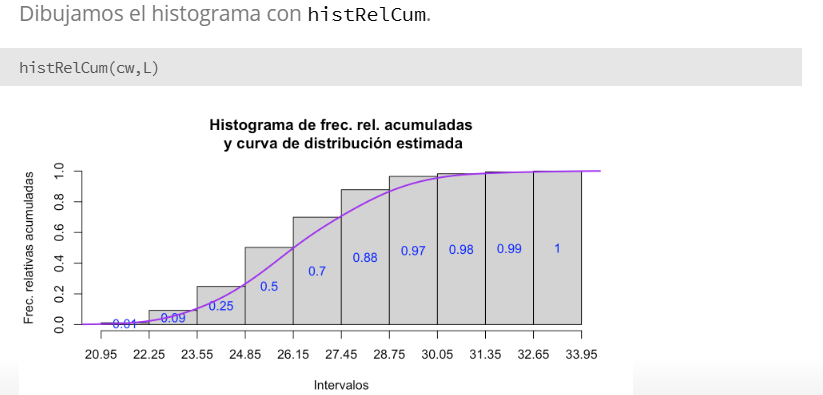

## Funciones:

In [1]:
# Funciones para frecuencias absolutas:

# Funcion que grafica el histograma de frecuencias absolutas
histAbs = function(x,L) {
  h = hist(x, breaks = L, right = FALSE, freq = FALSE,
           xaxt = "n", yaxt = "n", col = "lightgray", 
           main = "Histograma de frecuencias absolutas", 
           xlab = "Intervalos y marcas de clase",ylab = "Frecuencias absolutas")
  axis(1, at=L)
  text(h$mids, h$density/2, labels=h$counts, col="purple") 
  }

# Funcion que grafica el histograma de frecuencias absolutas acumuladas
histAbsCum = function(x,L) {
  h = hist(x, breaks = L, right = FALSE , plot = FALSE) 
  h$density = cumsum(h$density)
  plot(h, freq = FALSE, xaxt = "n", yaxt = "n", col = "lightgray", 
       main = "Histograma de frecuencias\nabsolutas acumuladas", xlab = "Intervalos", 
       ylab = "Frec. absolutas acumuladas")
  axis(1, at=L)
  text(h$mids, h$density/2, labels = cumsum(h$counts), col = "purple") 
  }

In [30]:
# funciones:

# funcion que grafica el histogramas de frecuencias relativas
histRel = function(x,L) {
  h = hist(x, breaks=L, right=FALSE , plot=FALSE)
  t = round(1.1*max(max(density(x)[[2]]),h$density),2) 
  plot(h, freq = FALSE, col = "lightgray", 
       main = "Histograma de frec. relativas\ny curva de densidad estimada", 
       xaxt="n", ylim=c(0,t), xlab="Intervalos", ylab="Densidades")
  axis(1, at = L) 
  text(h$mids, h$density/2, labels = round(h$counts/length(x),2), col = "blue")
  lines(density(x), col = "purple", lwd = 2) 
  }

# funcion que grafica el histogramas de frecuencias relativas acumuladas
histRelCum = function(x,L){
  h = hist(x, breaks = L, right = FALSE , plot = FALSE)
  h$density = cumsum(h$counts)/length(x)
  plot(h, freq = FALSE, 
      main = "Histograma de frec. rel. acumuladas\n y curva de distribución estimada", 
      xaxt = "n", col = "lightgray", xlab = "Intervalos", 
      ylab = "Frec. relativas acumuladas") 
  axis(1, at = L)
  text(h$mids, h$density/2, labels = round(h$density ,2), col = "blue")
  dens.x = density(x)
  dens.x$y = cumsum(dens.x$y)*(dens.x$x[2]-dens.x$x[1]) 
  lines(dens.x,col = "purple",lwd = 2)
}

## Ejemplos:

In [6]:
crabs = read.table("base de datos/datacrab.txt", header = TRUE)

cw = crabs$width # variable que contiene datos de la variable width (anchura de los cangrejos en mm)

# elegir numero de intervalos:
nIntervalos = nclass.scott(cw)

# elegir amplitud de intervalos:
A = diff(range(cw)) / 10
A = 1.3 # debemos redondear por exceso a un cifra decimal el resultado obtenido. 

# Calcular los extremos de los intervalos:
L1 = min(cw)-1/2*0.1 #donde 0.1 es nuestra precisión (décimas de unidad, en este caso).
L = L1 + A*(0:10) # calcular el resto de intervalos

# Calcular las marcas de clase:

X1 = (L[1]+L[2])/2
X = (L[1:length(L)-1]+L[2:length(L)])/2
#tabla = TablaFrecs(cw, nIntervalos, A, 0.1)

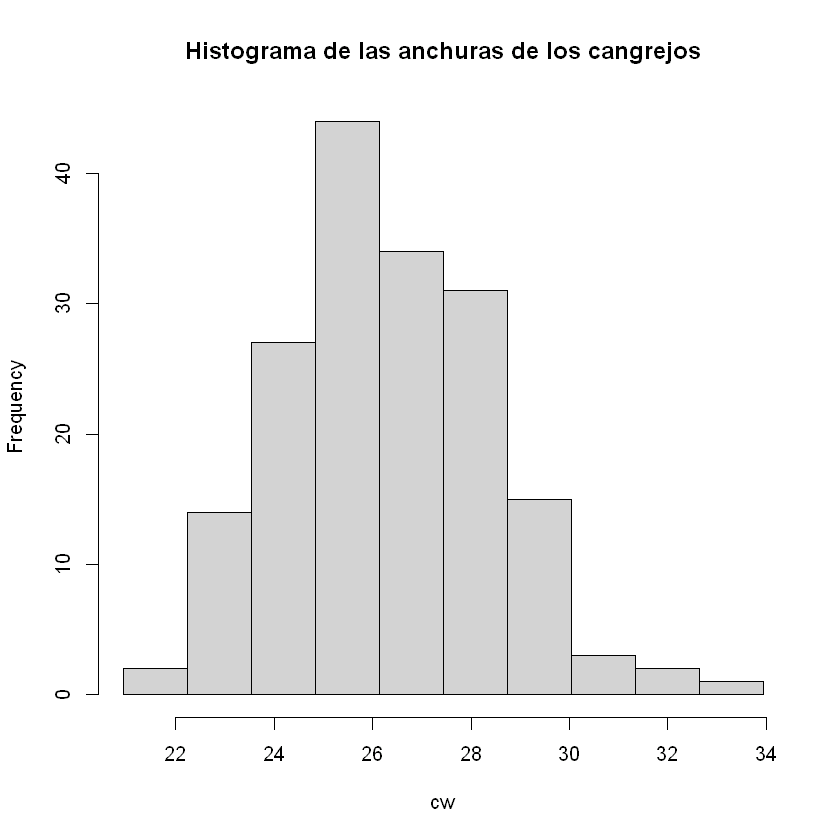

In [7]:
hist(cw,  # vector de datos
    breaks = L, # numero de intervalos
    right = FALSE, # cerrado a la derecha
    main = "Histograma de las anchuras de los cangrejos" #titulo de la imagen
    )

In [12]:
histogram =hist(cw, breaks = L, right = FALSE, plot = FALSE)

# extremos de los intervalos del histograma
hist(cw, breaks = L, right = FALSE, plot = FALSE)$breaks 

[1] 20.95 22.25 23.55 24.85 26.15 27.45 28.75 30.05 31.35 32.65 33.95

In [ ]:
# conteo de las frecuencias absolutas
histogram$counts

[1]  2 14 27 44 34 31 15  3  2  1

In [19]:
# Frecuencia relativa para cada intervalos
histogram$density

[1] 0.008892841 0.062249889 0.120053357 0.195642508 0.151178301 0.137839040
 [7] 0.066696309 0.013339262 0.008892841 0.004446421

In [ ]:
# Marcas de clase o puntos medios de cada intervalo
histogram$mids

[1] 21.6 22.9 24.2 25.5 26.8 28.1 29.4 30.7 32.0 33.3

In [ ]:
# Nombre del vector de datos
histogram$xname

[1] "cw"

In [ ]:
# si es equidistante
histogram$equidist

[1] TRUE

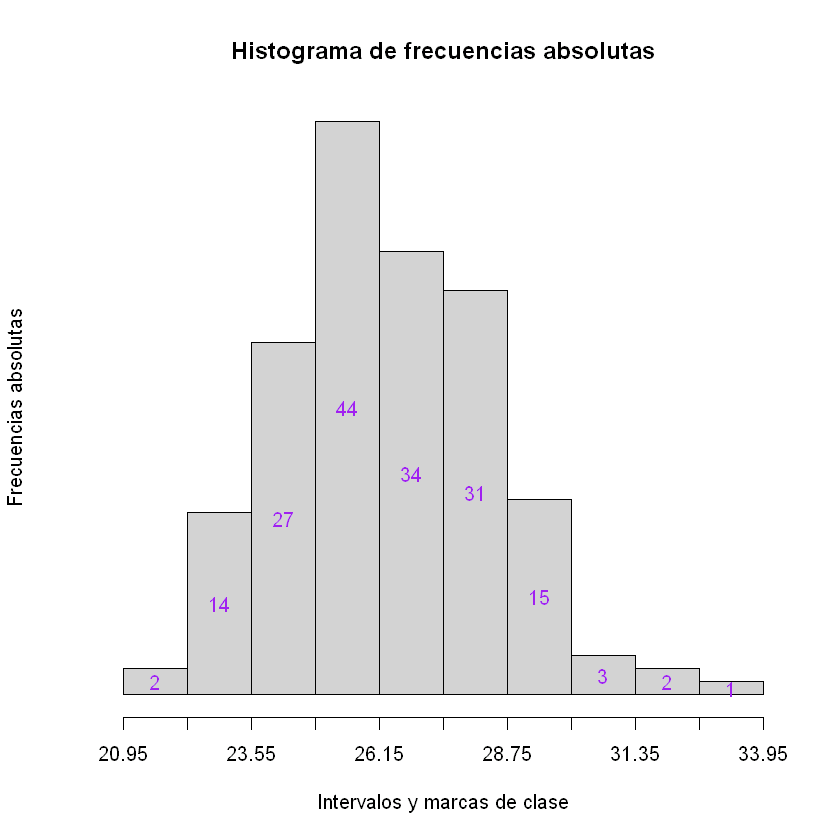

In [24]:
# Dibujamos el histograma de frecuncias absolutas:
histAbs(cw,L)

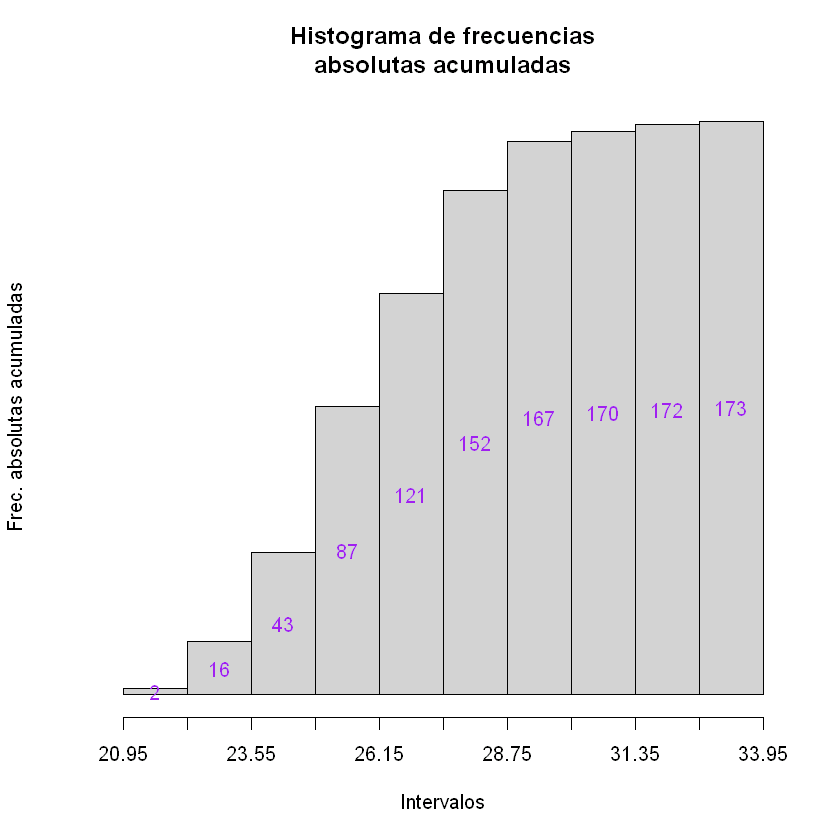

In [25]:
# Dibujamos el histograma de frecuncias absolutas acumuladas:
histAbsCum(cw,L)

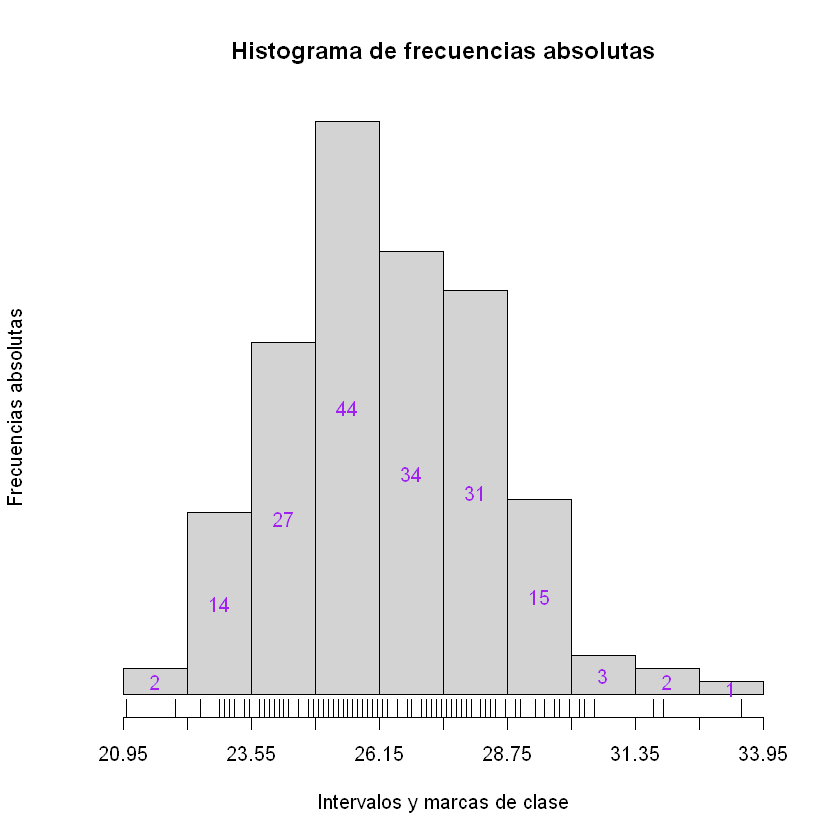

In [26]:
# Hacemos uso de las funciones rug y jitter
histAbs(cw,L)
rug(cw)

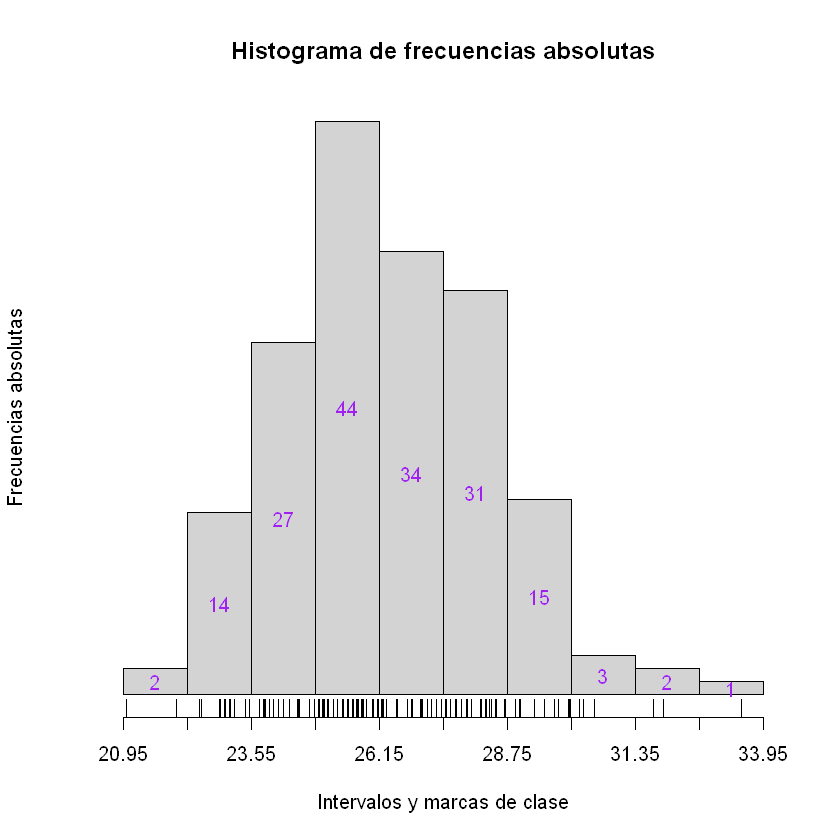

In [27]:
histAbs(cw,L)
rug(jitter(cw))

In [28]:
str(density(cw))

List of 8
 $ x         : num [1:512] 19 19 19.1 19.1 19.1 ...
 $ y         : num [1:512] 3.86e-05 4.46e-05 5.13e-05 5.89e-05 6.76e-05 ...
 $ bw        : num 0.671
 $ n         : int 173
 $ old.coords: logi FALSE
 $ call      : language density.default(x = cw)
 $ data.name : chr "cw"
 $ has.na    : logi FALSE
 - attr(*, "class")= chr "density"


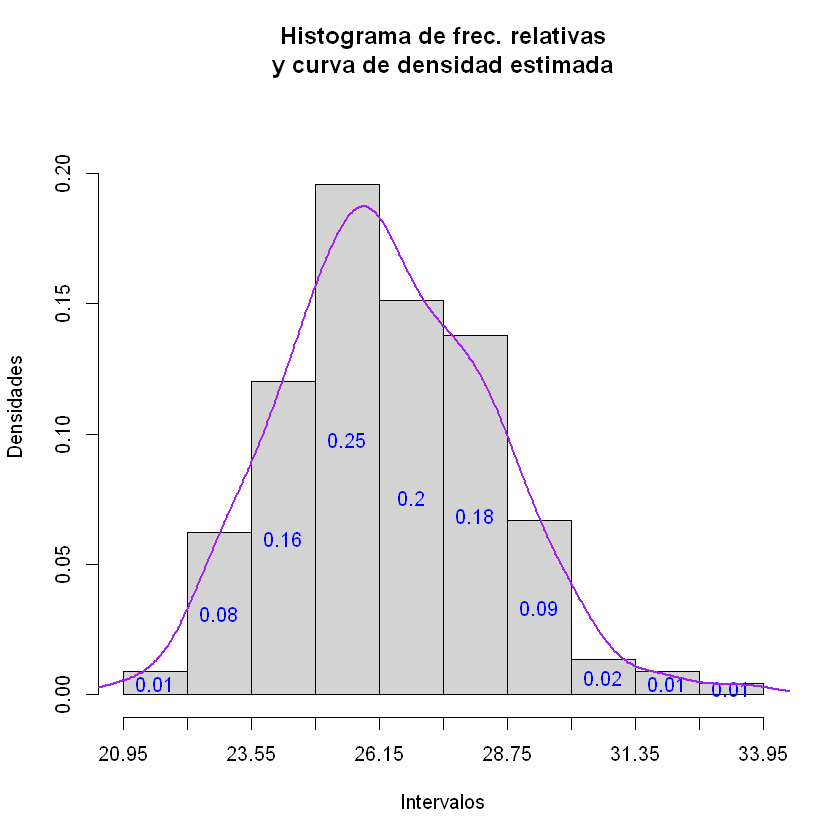

In [32]:
# Dibujamos el histograma de frecuncias relativas:
histRel(cw,L)

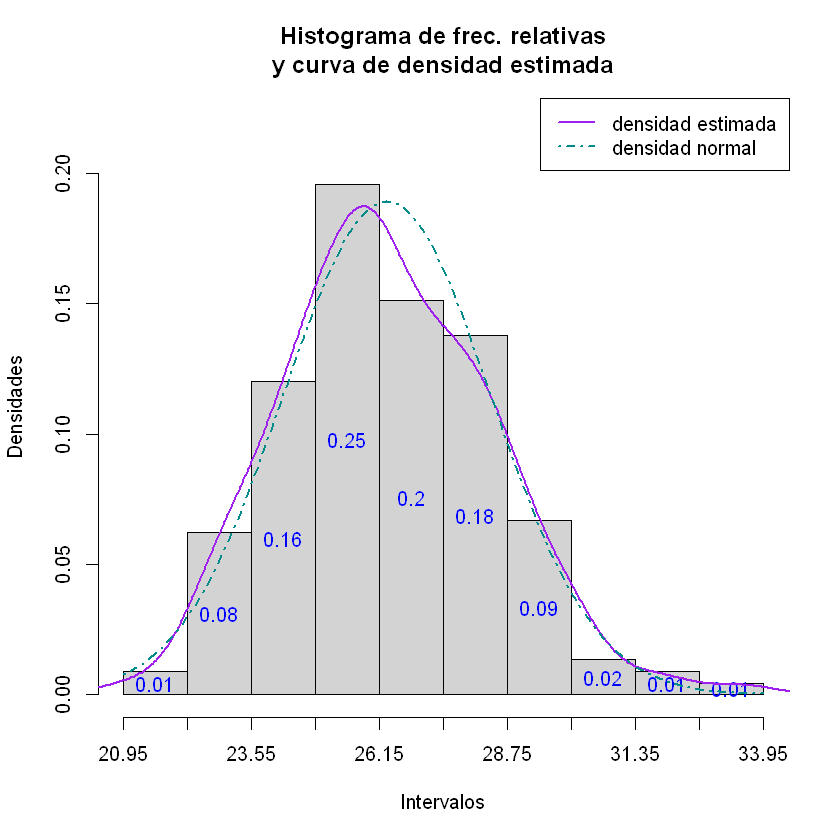

In [34]:
# añadir al histograma la gráfica de la función densidad de una distribución normal de media y 
#desviación típica las del conjunto de datos original

histRel(cw,L)
curve(dnorm(x, mean(cw), sd(cw)), col="cyan4", lty=4, lwd=2,
add=TRUE)
legend("topright", lwd=c(2,2), lty=c(1,4), col=c("purple","cyan4"),
       legend=c("densidad estimada","densidad normal"))

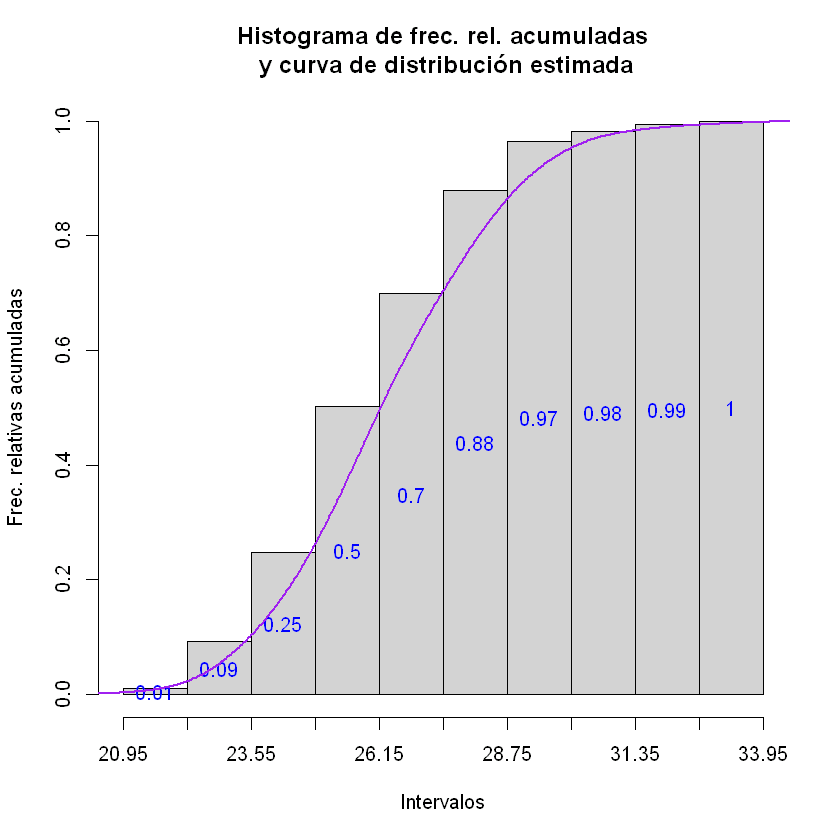

In [35]:
# Dibujamos el histograma de frecuncias relativas acumuladas:
histRelCum(cw,L)